In [1]:
from LSTM import LSTMNetwork
# from GRU import GRUNetwork
from RNNClassifier import RNNClassifier
from Training_Functions import mixed_curriculum_train,make_train_set_for_target,make_test_set
# from Tomita_Grammars import tomita_1, tomita_2, tomita_3, tomita_4, tomita_5, tomita_6, tomita_7

In [43]:
# define the manual labelling of words
def target(w):
    if("a" in w):
        return True
    return False
alphabet = "abc"
train_set = make_train_set_for_target(target,alphabet)
# print(train_set)
# define rnn
rnn = RNNClassifier(alphabet,num_layers=1,hidden_dim=10,RNNClass = LSTMNetwork)

made train set of size: 876 , of which positive examples: 593
{'': False, 'a': True, 'b': False, 'c': False, 'aa': True, 'ab': True, 'ca': True, 'ac': True, 'ba': True, 'bb': False, 'cc': False, 'cb': False, 'bc': False, 'abb': True, 'aab': True, 'aba': True, 'acc': True, 'bca': True, 'cca': True, 'abc': True, 'acb': True, 'baa': True, 'bab': True, 'aac': True, 'cab': True, 'caa': True, 'bac': True, 'bba': True, 'aca': True, 'cba': True, 'aaa': True, 'cac': True, 'bcc': False, 'ccc': False, 'cbb': False, 'bbc': False, 'bbb': False, 'bcb': False, 'cbc': False, 'ccb': False, 'aabc': True, 'acbc': True, 'accc': True, 'caca': True, 'bcba': True, 'baac': True, 'babc': True, 'aacc': True, 'cbba': True, 'ccac': True, 'abcc': True, 'ccab': True, 'bacc': True, 'bacb': True, 'cabc': True, 'bcac': True, 'ccba': True, 'acba': True, 'acac': True, 'cacb': True, 'caaa': True, 'cacc': True, 'bcca': True, 'abab': True, 'cabb': True, 'aaab': True, 'accb': True, 'aaca': True, 'caab': True, 'caac': True, 

current average loss is:  0.006444910618434239
current average loss is:  0.0018108682791617785
current average loss is:  0.0008421523118158803


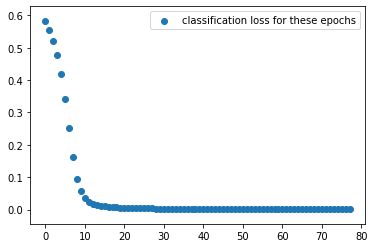

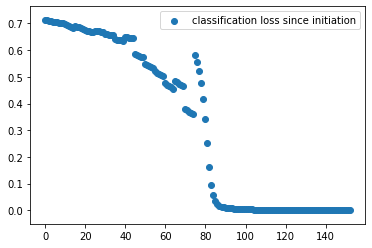

classification loss on last batch was: 0.0004903569003958678


In [44]:
# train the model
mixed_curriculum_train(rnn,train_set,stop_threshold = 0.0005)
rnn.renew()  

In [45]:
# generate_test_set
test_set=make_test_set(alphabet)

made test set of size: 173


In [46]:
# membership queries
positive_example=[]
negative_example=[]

for example in test_set:
    if(rnn.classify_word(example)):
        positive_example.append(example)
    else:
        negative_example.append(example)

In [47]:
print(positive_example[:10])

['a', 'ba', 'ac', 'ab', 'ca', 'aa', 'acc', 'aaa', 'cba', 'aca']


In [48]:
print(negative_example[:10])

['', 'b', 'c', 'cb', 'bb', 'cc', 'bc', 'ccb', 'cbbc', 'cbccc']


In [50]:
def to_trace(example,length_alphabet, char_to_int):
    integer_encoded = [char_to_int[char] for char in example]
    # one hot encode
    onehot_encoded = list()
    for value in integer_encoded:
        letter = [0 for _ in range(length_alphabet)]
        letter[value] = 1
        onehot_encoded.append(letter)
    # trace format
    trace=";".join([",".join(map(str, record)) for record in onehot_encoded])

    return trace


In [51]:
# write positive and negative examples as a traces in a file
alphabet="abc"
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
trace=to_trace(positive_example[0],3, char_to_int)

string=""
for example in positive_example[:5]:
    trace=to_trace(example,3,char_to_int)
    if(trace != ""):
        string+=trace+"\n"
string+="---\n"
for example in negative_example[:5]:
    trace=to_trace(example,3,char_to_int)
    if(trace != ""):
        string+=trace+"\n"
fin=open("dummy.trace","w")
fin.write(string[:-1])
fin.close()
